In [25]:
import sys
!{sys.executable} -m pip install xgboost

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn import metrics 
from sklearn.svm import SVC 
from xgboost import XGBRegressor 
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn.ensemble import RandomForestRegressor 

import warnings 
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('train.csv') 
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df.shape

(10886, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


# Feature Engineering

In [6]:
#seperating date and time
parts = df["datetime"].str.split(" ", n=2, expand=True) 
df["date"] = parts[0] 
df["time"] = parts[1].str[:2].astype('int') 
df.head() 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,4


In [7]:
#seperating day, month and year
parts = df["date"].str.split("-", n=3, expand=True) 
df["day"] = parts[2].astype('int') 
df["month"] = parts[1].astype('int') 
df["year"] = parts[0].astype('int') 
df.head() 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,0,1,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2,1,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,3,1,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,4,1,1,2011


In [8]:
#Whether it is a weekend or a weekday must have some effect on the ride request count.
from datetime import datetime 
import calendar 


def weekend_or_weekday(year, month, day): 

    d = datetime(year, month, day) 
    if d.weekday() > 4: 
        return 0
    else: 
        return 1


df['weekday'] = df.apply(lambda x: 
                        weekend_or_weekday(x['year'], 
                                            x['month'], 
                                            x['day']), 
                        axis=1) 
df.head() 


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,day,month,year,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,0,1,1,2011,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,1,1,2011,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2,1,1,2011,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,3,1,1,2011,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,4,1,1,2011,0


In [9]:
#Bike ride demands are also affected by whether it is am or pm.
def am_or_pm(x): 
    if x > 11: 
        return 1
    else: 
        return 0


df['am_or_pm'] = df['time'].apply(am_or_pm) 
df.head() 


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,day,month,year,weekday,am_or_pm
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,0,1,1,2011,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,1,1,2011,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2,1,1,2011,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,3,1,1,2011,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,4,1,1,2011,0,0


In [10]:
pip install --upgrade holidays

Note: you may need to restart the kernel to use updated packages.


In [10]:
#It would be nice to have a column which can indicate whether there was any holiday on a particular day or not.
from datetime import date 
import holidays 


def is_holiday(x): 

    india_holidays = holidays.country_holidays('IN') 

    if india_holidays.get(x): 
        return 1
    else: 
        return 0


df['holidays'] = df['date'].apply(is_holiday) 
df.head() 


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,day,month,year,weekday,am_or_pm,holidays
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,0,1,1,2011,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,1,1,2011,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2,1,1,2011,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,3,1,1,2011,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,4,1,1,2011,0,0,0


In [11]:
#Now let’s remove the columns which are not useful for us.
df.drop(['datetime', 'date'], 
        axis=1, 
        inplace=True) 

# Exploratory Data Analysis

EDA is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations. 

We have added some features to our dataset using some assumptions. Now let’s check what are the relations between different features with the target feature.

In [12]:
df.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
time          0
day           0
month         0
year          0
weekday       0
am_or_pm      0
holidays      0
dtype: int64

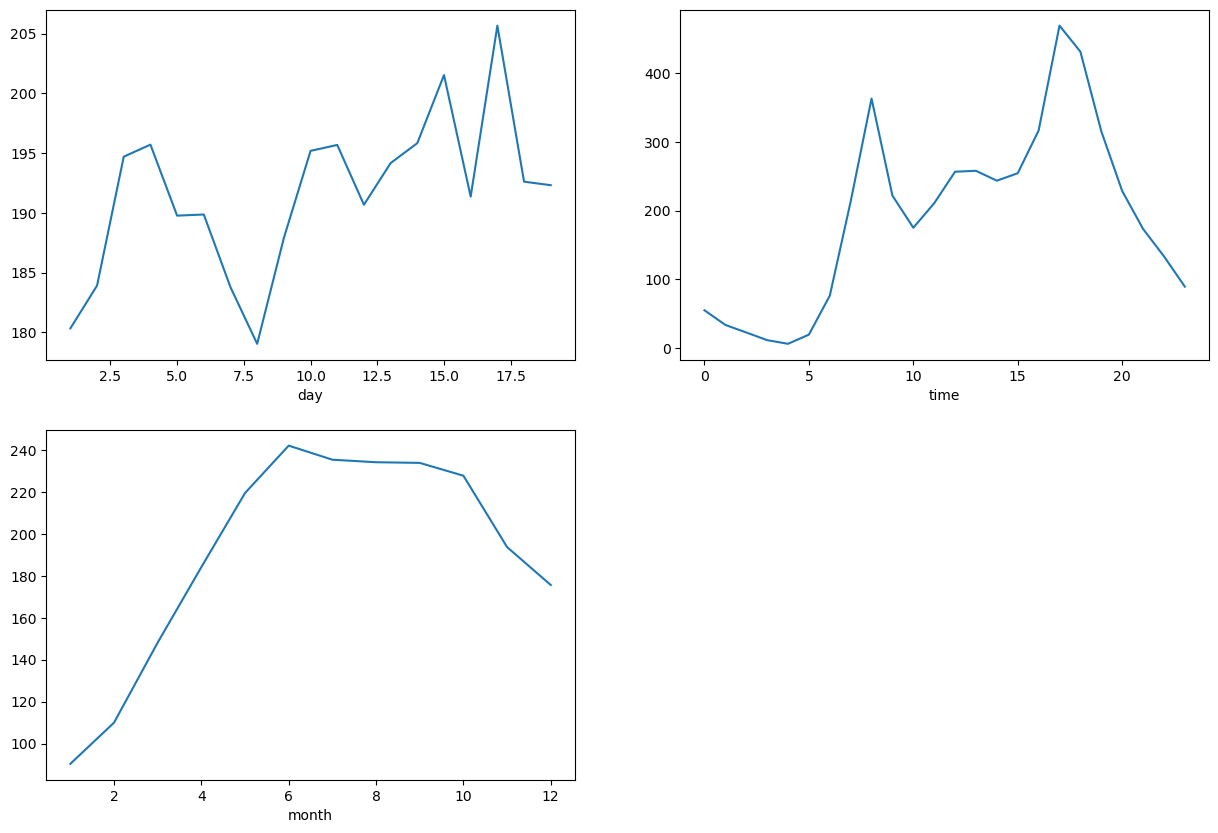

In [13]:
#Now, we will check for any relation between the ride request count with respect to the day, time, or month.
features = ['day', 'time', 'month'] 

plt.subplots(figsize=(15, 10)) 
for i, col in enumerate(features): 
    plt.subplot(2, 2, i + 1) 
    df.groupby(col).mean()['count'].plot() 
plt.show() 


From the above line plots we can confirm some real-life observations:

There is no such pattern in the day-wise average of the ride requests.
More ride requests in the working hours as compared to the non-working hours.
The average ride request count has dropped in the month of festivals that is after the 7th month that is July that is due to more holidays in these months.

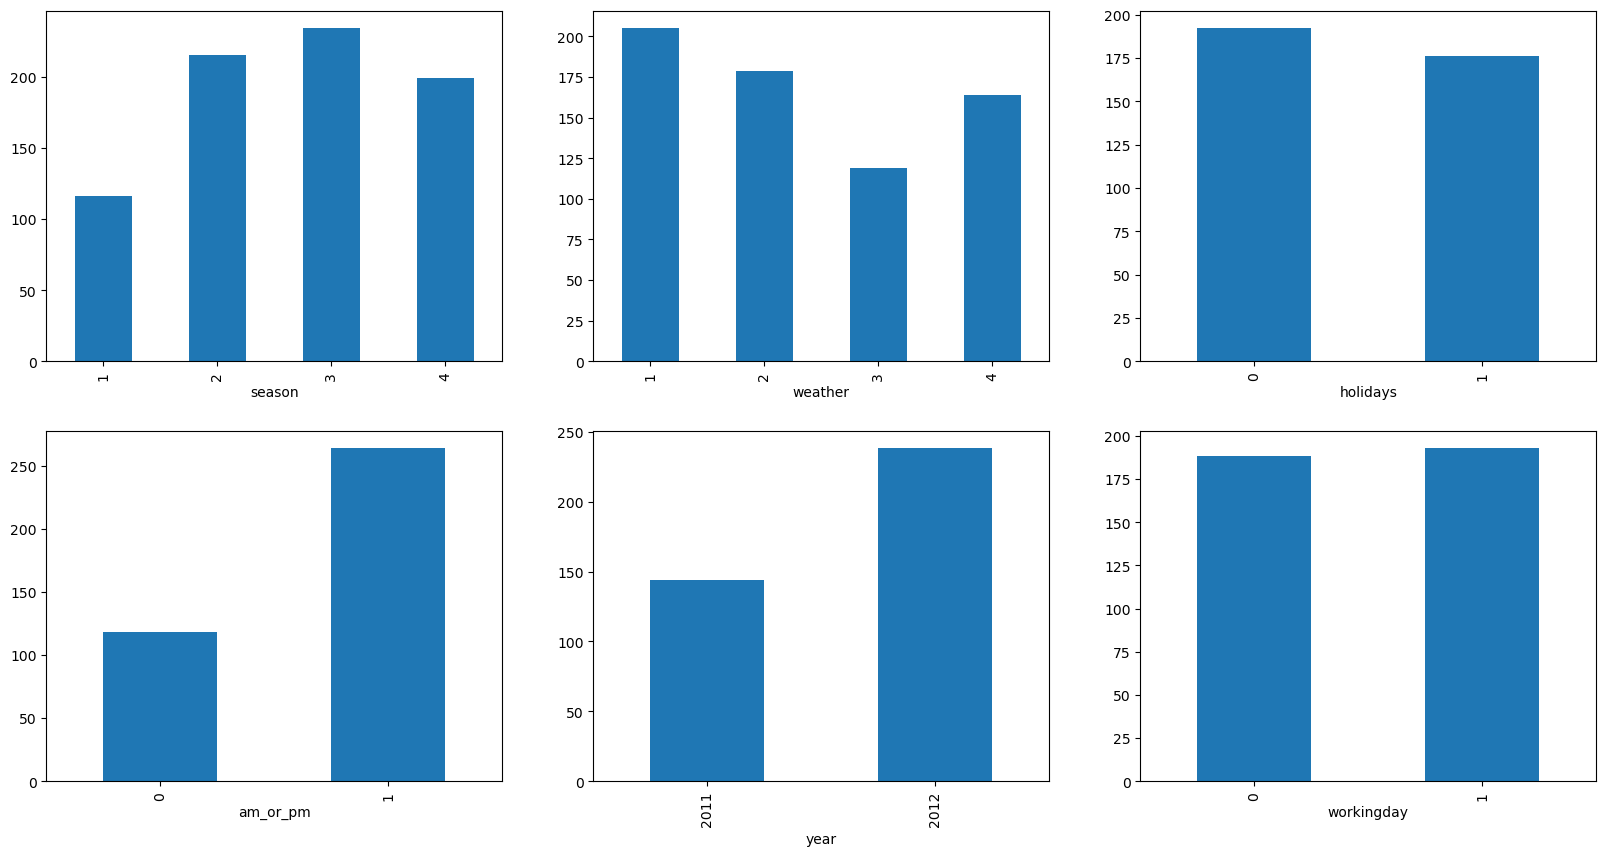

In [14]:
features = ['season', 'weather', 'holidays',\
            'am_or_pm', 'year', 'workingday'] 

plt.subplots(figsize=(20, 10)) 
for i, col in enumerate(features): 
    plt.subplot(2, 3, i + 1) 
    df.groupby(col).mean()['count'].plot.bar() 
plt.show() 

From the above bar plots we can confirm some real-life observations:

Ride request demand is high in the summer as well as season.
The third category was extreme weather conditions due to this people avoid taking bike rides and like to stay safe at home.
On holidays no college or offices are open due to this ride request demand is low.
More ride requests during working hours as compared to non-working hours.
Bike ride requests have increased significantly from the year 2011 to the year 2012.

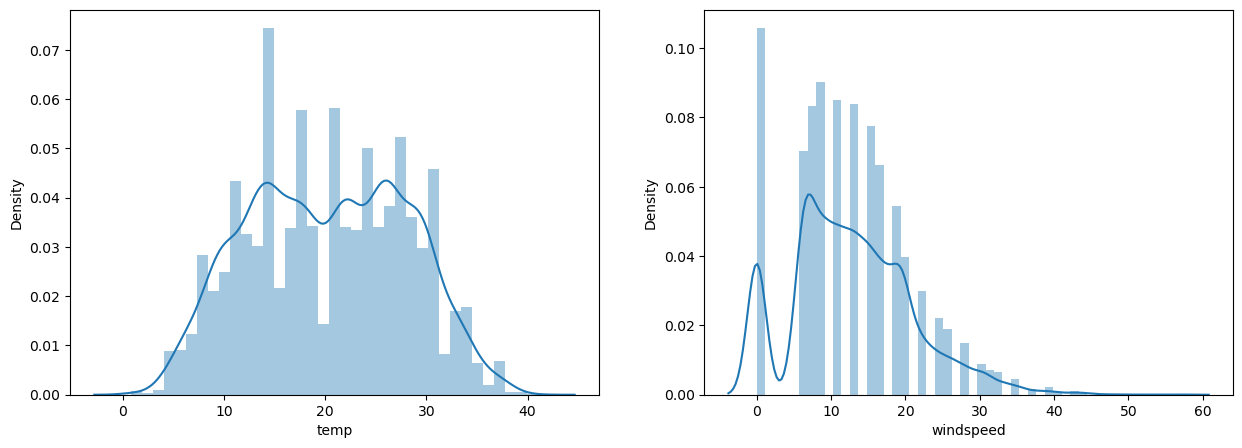

In [15]:
features = ['temp', 'windspeed'] 

plt.subplots(figsize=(15, 5)) 
for i, col in enumerate(features): 
    plt.subplot(1, 2, i + 1) 
    sb.distplot(df[col]) 
plt.show()

Temperature values are normally distributed but due to the high number of 0 entries in the windspeed column, the data distribution shows some irregularities.



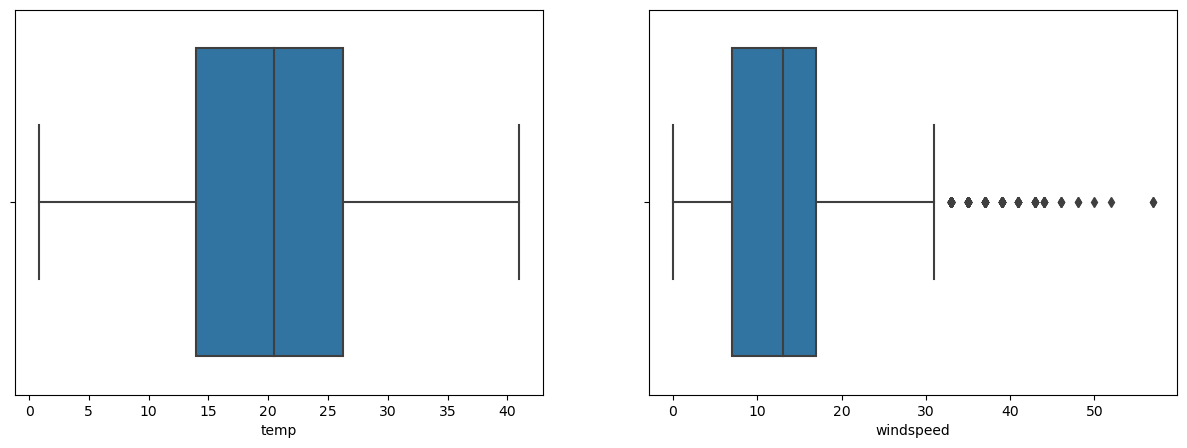

In [16]:
features = ['temp', 'windspeed'] 

plt.subplots(figsize=(15, 5)) 
for i, col in enumerate(features): 
    plt.subplot(1, 2, i + 1) 
    sb.boxplot(df[col]) 
plt.show()


Ah! outliers let’s check how much data we will lose if we remove outliers.

In [17]:
num_rows = df.shape[0] - df[df['windspeed']<32].shape[0] 
print(f'Number of rows that will be lost if we remove outliers is equal to {num_rows}.')

Number of rows that will be lost if we remove outliers is equal to 227.


We can remove this many rows because we have around 10000 rows of data so, this much data loss won’t affect the learning for our model.

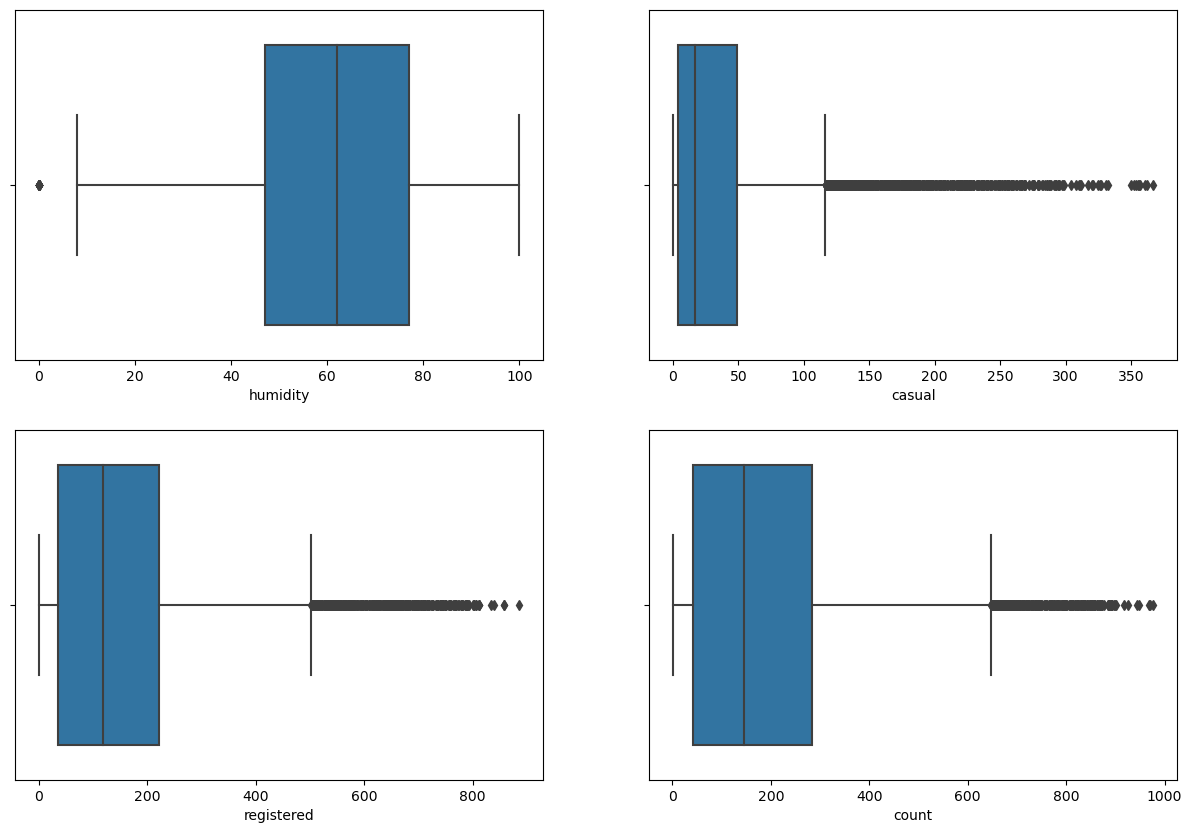

In [18]:
features = ['humidity', 'casual', 'registered', 'count'] 

plt.subplots(figsize=(15, 10)) 
for i, col in enumerate(features): 
    plt.subplot(2, 2, i + 1) 
    sb.boxplot(df[col]) 
plt.show() 

Now let’s check whether there are any highly correlated features in our dataset or not. 

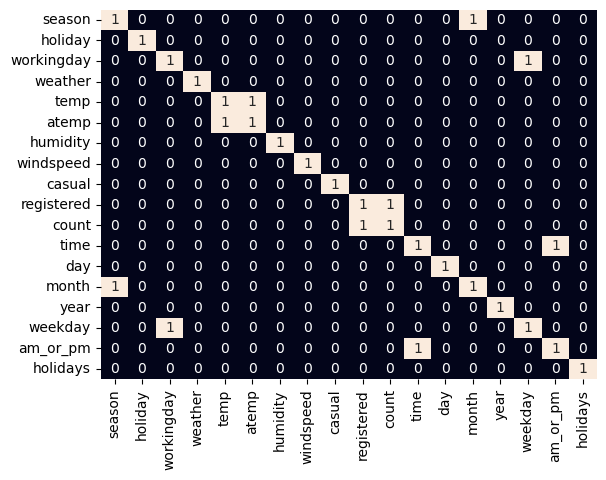

In [19]:
sb.heatmap(df.corr() > 0.8, 
        annot=True, 
        cbar=False) 
plt.show()

Here the registered feature is highly correlated with our target variable which is count. This will lead to a situation of data leakage if we do not handle this situation. So, let’s remove this ‘registered’ column from our feature set and also the ‘time’ feature.

Now, we have to remove the outliers we found in the above two observations that are for the humidity and wind speed.

In [20]:
df.drop(['registered', 'time'], axis=1, inplace=True) 
df = df[(df['windspeed'] < 32) & (df['humidity'] > 0)]

# Model Training

Now we will separate the features and target variables and split them into training and the testing data by using which we will select the model which is performing best on the validation data.

In [21]:
features = df.drop(['count'], axis=1) 
target = df['count'].values 

X_train, X_val, Y_train, Y_val = train_test_split(features, 
                                                target, 
                                                test_size = 0.1, 
                                                random_state=22) 
X_train.shape, X_val.shape


((9574, 15), (1064, 15))

Normalizing the data before feeding it into machine learning models helps us to achieve stable and fast training.

In [22]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_val = scaler.transform(X_val) 

We have split our data into training and validation data also the normalization of the data has been done. Now let’s train some state-of-the-art machine learning models and select the best out of them using the validation dataset.

In [23]:
from sklearn.metrics import mean_absolute_error as mae 
models = [LinearRegression(), XGBRegressor(), Lasso(), 
        RandomForestRegressor(), Ridge()] 

for i in range(5): 
    models[i].fit(X_train, Y_train) 

    print(f'{models[i]} : ') 

    train_preds = models[i].predict(X_train) 
    print('Training Error : ', mae(Y_train, train_preds)) 

    val_preds = models[i].predict(X_val) 
    print('Validation Error : ', mae(Y_val, val_preds)) 
    print() 


LinearRegression() : 
Training Error :  81.9825749927742
Validation Error :  82.18367698263508

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) : 
Training Error :  36.987835612422366
Validation Error :  60.2197608947929

Lasso() : 
Training Error :  81.64956832728453
Validation Error :  81.805418509

The predictions made by the RandomForestRegressor are really amazing compared to the other model.